# Logistic Regression Assignment
Implement the Logistic Regression learning by gradient ascent as described in class.
Before using logistic regression, be sure to normalize the variables of the training set
to have zero mean and standard deviation 1, and to do the exact same transformation to
the test set, using the mean and standard deviation of the training set

#### Import dependencies

In [216]:
import numpy as np
from scipy.sparse import csr_matrix
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

#### Load data

In [217]:
# TODO

#### Utility functions

In [218]:
def get_gisette():
    path = "data/gisette/"   
    
    train_x = np.loadtxt(path+"gisette_train.data")
    train_y = np.loadtxt(path+"gisette_train.labels")
    
    valid_x = np.loadtxt(path+"gisette_valid.data")
    valid_y = np.loadtxt(path+"gisette_valid.labels")
    
    test_x = np.loadtxt(path+"gisette_test.data")

    return train_x, train_y, valid_x, valid_y, test_x


def get_hill_valley():
    path = "data/hill-valley/"   
    
    train_x = np.loadtxt(path+"X.dat")
    train_y = np.loadtxt(path+"Y.dat")
    
    test_x = np.loadtxt(path+"Xtest.dat")
    test_y = np.loadtxt(path+"Ytest.dat")
    
    return train_x, train_y, test_x, test_y


def get_dexter():
    path = "data/dexter/"   
    
    def parse_X(file_path):
        def gen():
            with open(file_path) as f:
                for line in f:
                    dict = {}
                    for pair in line.split(" "):
                        if ":" in pair:
                            key, value = pair.split(":")
                            dict[key] = value
                    yield dict
        df = pd.DataFrame(gen())
        df.fillna(0, inplace=True)
        return df.values.astype("int")
    
    train_x = parse_X(path+"dexter_train.data")
    train_y = np.loadtxt(path+"dexter_train.labels")
    
    valid_x = parse_X(path+"dexter_valid.data")
    valid_y = np.loadtxt(path+"dexter_valid.labels")
    
    test_x = parse_X(path+"dexter_test.data")
    
    return train_x, train_y, valid_x, valid_y, test_x

In [219]:
def normalize(train, *args):
    print(train)
    mean = np.average(train, axis=0)
    standard_deviation = np.std(train, axis=0)
    columns = train, *args
    return tuple(np.divide(column-mean, standard_deviation, where=standard_deviation!=0)
                 for column in columns)

c:\users\okosa\pycharmprojects\machinelearningassignments\venv\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


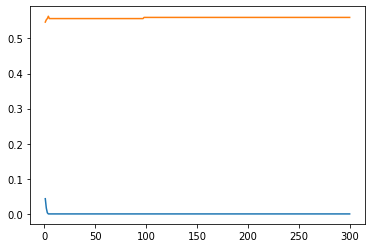

In [220]:
def logistic_regression(x, train_y, test_x, test_y):
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    test_x = np.hstack((np.ones((test_x.shape[0], 1)), test_x))
    iterations = 300
    lmb = 0.0001
    learning_rate = .001

    w = np.zeros(x.shape[1])
    scores = []
    scores_test = []

    for _ in range(iterations):
        y_hat = 1 / (1 + np.exp(-x.dot(w)))
        w = w - lmb * learning_rate * w + learning_rate * (train_y - y_hat) * y_hat * (1 - y_hat) @ x
        w = w - lmb * learning_rate * w + learning_rate * (train_y - y_hat) * y_hat * (1 - y_hat) @ x
        predicted_y = np.round(predict(x, w))
        scores.append(1 - accuracy_score(train_y, predicted_y))
        predicted_y = np.round(predict(test_x, w))
        scores_test.append(1 - accuracy_score(test_y, predicted_y))
    plt.plot(range(1,iterations + 1), scores)
    plt.plot(range(1,iterations + 1), scores_test)
    plt.show()

def predict(x, w):
    y = 1/(1 + np.exp(-(x.dot(w))))
    return y

logistic_regression(train_x, train_y, valid_x, valid_y)

## Gisette

In [221]:
train_x, train_y, valid_x, valid_y, test_x = get_gisette()
train_x, valid_x, test_x = normalize(train_x, valid_x, test_x)
train_y[train_y==-1] = 0
valid_y[valid_y==-1] = 0

[[550.   0. 495. ...   0.   0. 983.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 991. ...   0.   0. 991.]]


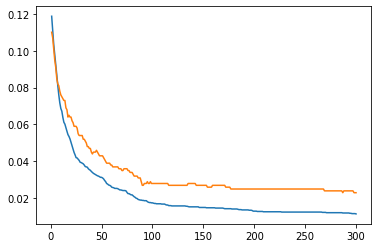

In [222]:
logistic_regression(train_x, train_y, valid_x, valid_y)

## Hill Valley

In [223]:
train_x, train_y, test_x, test_y = get_hill_valley()
train_x, test_x = normalize(train_x, test_x)

[[3.902000e+01 3.649000e+01 3.820000e+01 ... 3.946000e+01 3.750000e+01
  3.910000e+01]
 [1.830000e+00 1.710000e+00 1.770000e+00 ... 1.780000e+00 1.750000e+00
  1.690000e+00]
 [6.817769e+04 6.613842e+04 7.298188e+04 ... 7.106372e+04 6.740427e+04
  7.492024e+04]
 ...
 [5.310000e+00 5.030000e+00 5.170000e+00 ... 5.140000e+00 5.120000e+00
  5.040000e+00]
 [1.030000e+00 1.020000e+00 1.090000e+00 ... 1.100000e+00 1.110000e+00
  1.070000e+00]
 [6.177000e+01 5.863000e+01 6.306000e+01 ... 6.513000e+01 5.974000e+01
  6.386000e+01]]


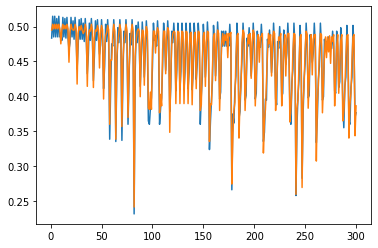

In [224]:
logistic_regression(train_x, train_y, test_x, test_y)

## Dexter

In [225]:
train_x, train_y, valid_x, valid_y, test_x = get_dexter()
print(train_x.shape)
print(train_y.shape)
print(valid_x.shape)
print(valid_y.shape)
print(test_x.shape)

(300, 7751)
(300,)
(300, 7847)
(300,)
(2000, 16756)


In [226]:
def pad(matrix):
    shape = (matrix.shape[0], 17000)
    temp = np.zeros(shape)
    temp[:shape[0],:matrix.shape[1]] = matrix
    return temp

train_x = pad(train_x)
valid_x = pad(valid_x)
test_x = pad(test_x)
#train_x, valid_x, test_x = normalize(train_x, valid_x, test_x)
test_x, valid_x, train_x = normalize(test_x, valid_x, train_x)
train_y[train_y==-1] = 0
valid_y[valid_y==-1] = 0
valid_y[valid_y==-1] = 0

[[ 24. 163. 234. ...   0.   0.   0.]
 [  0.   0.  63. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0. 125. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


c:\users\okosa\pycharmprojects\machinelearningassignments\venv\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


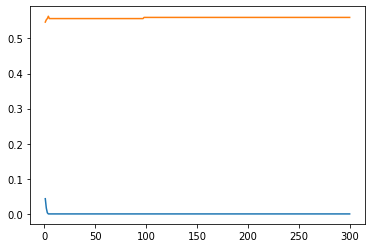

In [228]:
logistic_regression(train_x, train_y, valid_x, valid_y)
